In this notebook, we will build a classification model on Unstructured Data - To predict whether a Video Game User would recommend the game to others or not. The prediction would be done based on the User Reviews for Games played across different Genres and we would use NaiveBayes model for the text classification on a bag of words features.



In [1]:
import pandas as pd
df = pd.read_csv("game_recommendation_data.csv")
df_overview = pd.read_csv("game_overview.csv")

In [2]:
df_overview.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [3]:
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [4]:
df_overview.shape

(64, 5)

In [5]:
df.shape

(17494, 5)

Let's merge these datasets to understand the Games Overview as well. 


In [6]:
df_merge = df.merge(df_overview, on='title', how='left')

In [7]:
df_merge.head()

,review_id,title,year,user_review,user_suggestion,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...


In [8]:
df_merge.shape

(17494, 9)

Let's look at a sample review each for Users Suggested to vs No Users Suggested to.

Let's look at the Distribution of the User Suggestion field


In [80]:
#User Suggested review
df['user_review'][0]

"I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door."

In [81]:
#review not suggested to user
df['user_review'][8]

"Somewhere between light hearted, happy parody and being afraid of the dark lies Spooky's House of Jump Scares. You are tasked with the daunting duty of surviving one thousand rooms in this endless first person perspective runner. Each room is no more than a few seconds thanks to a sprint key and the fact that each door counts as a new room. Even then one thousand rooms is still a feat against tedium and needless repetition. There are still things every fifteen or so rooms to keep your interest and at the end of fifty rooms you'll find a save point, but nothing can save you from permanent death at the hands of the foul creatures that live within.On the surface the game has a clean, chipper almost cartoon low budget charm to it. Jump scares are rare and at first it comes in the form of adorable cardboard cutouts of pumpkins, ghosts and skeletons that pop out of the wall accompanied by a sound. Some of the sounds are silly and unfitting other times its screeches to drive chills down your

In [9]:
df_merge['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

The Target Variable looks balanced with a ratio of 4:3 on the Not Suggested vs Suggested sub-classes


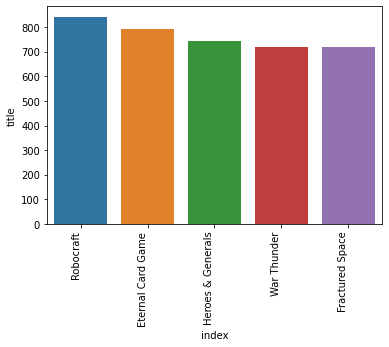

In [33]:
#Top 5 Movies based on User Reviews count
import seaborn as sns
import sys
import matplotlib.pyplot as plt
title_vals = df_merge['title'].value_counts().head().reset_index()
ax = sns.barplot(x='index', y='title', data=title_vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()


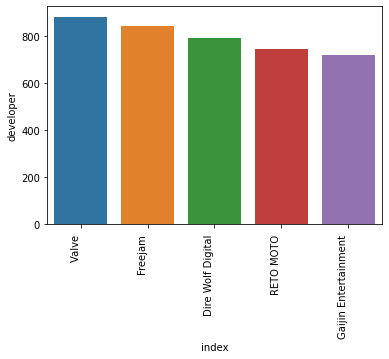

In [34]:
#Top 5 Developers based on User Reviews count
import seaborn as sns
import sys
import matplotlib.pyplot as plt
developers_vals = df_merge['developer'].value_counts().head().reset_index()
ax = sns.barplot(x='index', y='developer', data=developers_vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

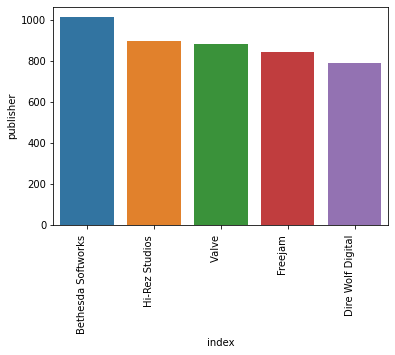

In [35]:
#Top 5 publishers based on User Reviews count
import seaborn as sns
import sys
import matplotlib.pyplot as plt
publisher_vals = df_merge['publisher'].value_counts().head().reset_index()
ax = sns.barplot(x='index', y='publisher', data=publisher_vals)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

Let's answer a few Business Questions Below :

1) What is the User Suggestion Rate of games developed by the Developer ?

2) What is the User Suggestion Rate across different Games?

3) What is the User Suggeston Rate across different publishers?
  

In [37]:
#User Suggestion Rate of games developed by the Developer
pd.crosstab(df_merge['developer'],df_merge['user_suggestion']).apply(lambda r: r/r.sum(), axis=1)

user_suggestion,0,1
developer,,
"Artix Entertainment, LLC",0.427746,0.572254
Aurora Studio,0.124105,0.875895
Bethesda Game Studios,0.398210,0.601790
Blue Mammoth Games,0.134146,0.865854
Camex Games,0.105263,0.894737
"Cloudcade, Inc.",0.134615,0.865385
Codename Entertainment Inc.,0.416667,0.583333
Creobit,0.518325,0.481675
Cryptic Studios,0.430403,0.569597


In [38]:
#User Suggestion Rate of games developed by the Publisher
pd.crosstab(df_merge['publisher'],df_merge['user_suggestion']).apply(lambda r: r/r.sum(), axis=1)

user_suggestion,0,1
publisher,,
8Floor,0.518325,0.481675
"Artix Entertainment, LLC",0.427746,0.572254
Bethesda Softworks,0.393281,0.606719
Camex Games,0.105263,0.894737
"Cloudcade, Inc.",0.134615,0.865385
Codename Entertainment Inc.,0.416667,0.583333
Daybreak Game Company,0.094270,0.905730
Deca Games,0.197059,0.802941
Dire Wolf Digital,0.374210,0.625790


In [39]:
#User Suggestion Rate of the Games
pd.crosstab(df_merge['title'],df_merge['user_suggestion']).apply(lambda r: r/r.sum(), axis=1)

user_suggestion,0,1
title,,
AdventureQuest 3D,0.427746,0.572254
Black Squad,0.138889,0.861111
Bless Online,0.787921,0.212079
Bloons TD Battles,0.587983,0.412017
Brawlhalla,0.134146,0.865854
Business Tour - Board Game with Online Multiplayer,0.518325,0.481675
Creativerse,0.099593,0.900407
Crusaders of the Lost Idols,0.416667,0.583333
Cuisine Royale,0.624060,0.375940


Now that we have looked at Data Analysis and insights, it's time to extract meaningul information from the unstructured data as well. We will use NLTK to perform basic text pre-processing like Word Tokenize, removing stop-words before we build a Classification Model


In [47]:
import re
import nltk
from nltk.corpus import stopwords
def clean_reviews(review):
    #removing umbers,punctuations
    letters_only = re.sub("[^a-zA-Z]"," ",review)
    #convert the words to lower case
    words = letters_only.lower().split()
    #creating the list of stop words
    stop = set(stopwords.words("english"))
    #removing stopwords from the review
    meaningful_words = [w for w in words if w not in stop]
    #return the cleansed text
    return(" ".join(meaningful_words))

In [57]:
# finding the number of user reviews
num_reviews = df_merge.user_review.size
print(num_reviews)


17494


In [58]:
# storing all cleansed reviews in a list

cleaned_review = []
for i in range(num_reviews):
    cleaned_review.append(clean_reviews(df_merge.user_review[i]))

In [61]:
#Creating the Bag of Words Model
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer="word",
                            preprocessor=None,
                            stop_words="english",
                            max_features=5000)

In [62]:
# converting reviews from text into features

input_features = vectorizer.fit_transform(cleaned_review)

#change the classifier into array

input_features = input_features.toarray()

In [63]:
X = input_features

#dependent variable,y will be 1 for User Suggestion and 0 for No Suggestion

y = df_merge.user_suggestion 

In [64]:

print (X.shape) 
print (y.shape) 

(17494, 5000)
(17494,)


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=123)

Let's build a NaiveBayes Model to classify the User review for a Recommendation or not


In [66]:
from sklearn.naive_bayes import BernoulliNB


naive = BernoulliNB()
classifier = naive.fit(X_train,y_train)
predict = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(predict,y_test)

In [67]:
print(cm)

[[1342  288]
 [ 508 2236]]


In [68]:
accuracy = cm.trace()/cm.sum()
print(accuracy)

0.8180155464106081


In [69]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score

In [70]:
print (f1_score(y_test, predict))

0.8488990129081244


Using a NaiveBayes Algorithm, the model yielded an Accuracy of 81% and a F1-Score of 85%

Let's understand what were the words that were mentioned for Users who have susggested games to others


In [71]:
from wordcloud import WordCloud, STOPWORDS 

In [72]:
df_merge_1 = df_merge[df_merge['user_suggestion'] == 1]

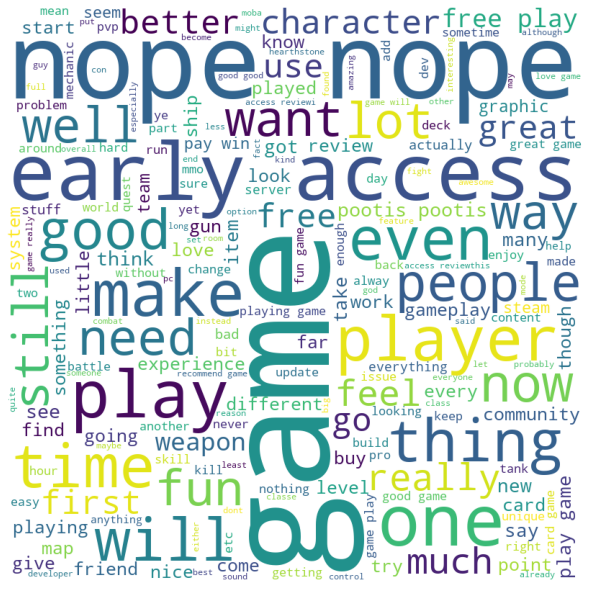

In [76]:
review_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the reviews 
for rev in df_merge_1.user_review: 
      
  
    # split the value 
    tokens = rev.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    review_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [77]:
df_merge_0 = df_merge[df_merge['user_suggestion'] == 0]

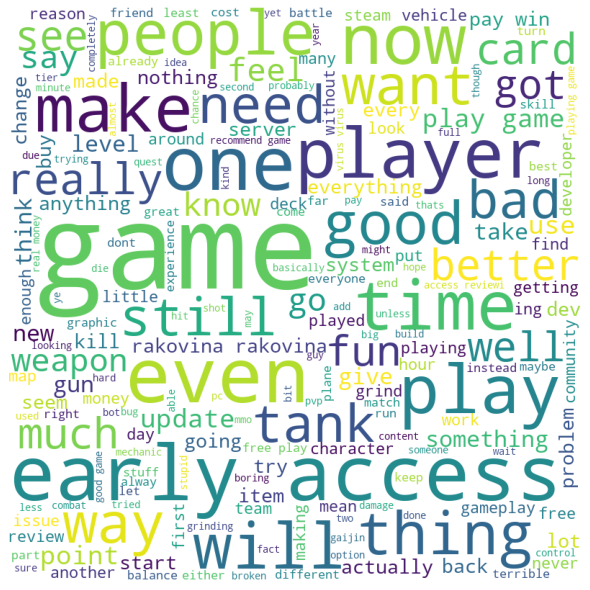

In [78]:
review_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the reviews 
for rev in df_merge_0.user_review: 
      
  
    # split the value 
    tokens = rev.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    review_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(review_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Thus, we have come to the end of this project. In this project, we saw how to build a Text Classification Model using NaiveBayes, with a Bag of Words Features. The model gave an Accuracy of 81% and a F1-Score of 85%.

